# Using KMeans clustering algorithm on customer segmnetation

The owner of a supermarket mall possesses basic data about their customers such as Customer ID, age, gender, annual income, and spending score through membership cards. The Spending Score is determined by the owner based on defined parameters such as customer behavior and purchasing data. The mall owner aims to identify target customers who can be easily converted, to provide guidance to the marketing team and plan the strategy accordingly.

this notebook will show how to apply KMeans Cluster on customer segmentation 

In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
missing_values = df.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

c:\Users\georg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\georg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\georg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\georg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

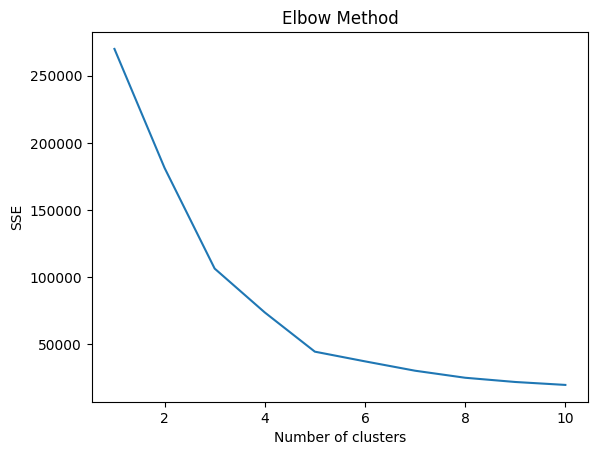

In [7]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


the plot above is used as a way to find the best number of customer groups to use for marketing strategies. It helps us balance having enough groups to capture different types of customers, but not so many that the groups become too small and ineffective. We want to find the sweet spot where we can create targeted marketing strategies for each group, and this plot helps us do that by showing us the optimal number of groups to use.

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


c:\Users\georg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


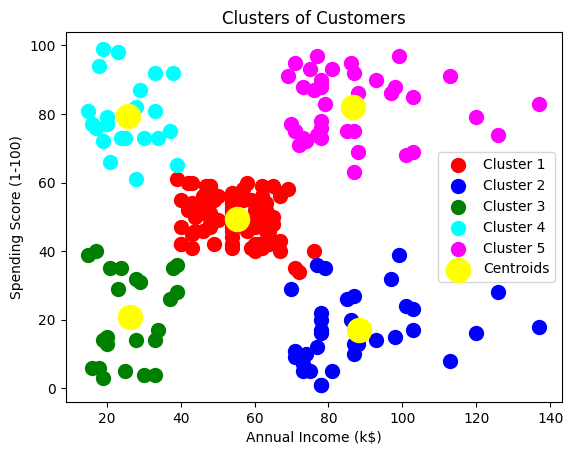

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


can see that customers have been grouped into 5 clusters based on their annual income and spending score. We can interpret the results and gain insights into the types of customers that visit the mall.

For example, customers in cluster 1 (red) have high annual incomes and high spending scores, indicating that they are the most valuable customers for the mall. Customers in cluster 3 (green) have moderate annual incomes and moderate spending scores, indicating that they are a good target for the mall to encourage spending. Customers in cluster 5 (magenta) have low annual incomes and high spending scores, indicating that they may be students or young people who do not have a lot of money but enjoy shopping. Customers in clusters 2 and 4 have either high annual incomes or high spending scores, but not both.

By understanding the characteristics of these different customer segments, the mall owner can develop targeted marketing strategies to increase sales and profits. For example, they could offer discounts to customers in cluster 3 to encourage more spending, or create loyalty programs to retain customers in cluster 1.

Overall, k-means clustering is a useful tool for identifying customer segments based on their behavior and demographics, and can provide valuable insights for businesses looking to optimize their marketing strategies.